Let's compute K-S algorithm
$$
    y[n] = x[n] + alpha * y[n - M]
$$
assuming that the input is the finite-support signal
$$
x[n] = \begin{cases}
    0 & \mbox{for $n < 0$} \\
    b_n & \mbox{for $0 \le n < M$} \\
    0 & \mbox{for $n \ge M$}
  \end{cases}
$$

In [1]:
## Math
import numpy as np

## nd.array deep copy
import copy

## Audio Playing
from IPython.display import Audio

## Wave file save
import scipy.io.wavfile as wavfile

## Visualization
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def karplus_strong(x, alpha, y_len):
    """
    Synthesizes a new waveform from an existing wavetable, modifies last sample by averaging.
    
    Parameters:
        x (list or nd.array) - initially generated signal
        a (float) - alpha
        M (int) - previous value of y
        y_len (int) - length of output signal
    
    Return:
        np.array - obtained y signal
    
    """
    x = copy.deepcopy(x)
    y = []
    M = len(x)
    for i in range(y_len):
        if i < M:
            y.insert(i, x[i])
        else:
            y.insert(i, alpha*y[i-M])
    return np.array(y)

In [8]:
def gen_signal_save_output( FS = 16000,
                            range_from = 1,
                           range_to = 10, 
                           x_len = 500,
                           alpha = 0.999,
                           M = 40,
                           path_to_save = '_outputs/'):
    """
    Parameters:
        range_from (int) - start range for random interval
        range_to (int) - end range for random interval
        x_len(int) - length of initial signal to generate
        alpha (float) - decay (or envelop)
        M (int) - previous value of y
        len_y (int) - length of output signal
        path_to_save (string) - relative directory wher wav file will be saved
    
    Returns:
        tuple (pair of x and y, for comparison)
    """
    y_len = FS * 2
    x = np.random.randint(range_from, range_to, x_len).astype(np.float)
    y = karplus_strong(x, alpha, y_len)
    wavfile.write(str(path_to_save) + 'y' + '.wav', FS, y)
    
    return y

In [9]:
FS = 16000

In [10]:
y = gen_signal_save_output(FS)

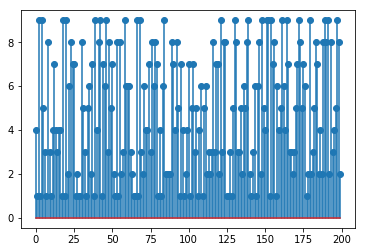

In [11]:
plt.stem(y[0:200]);

In [12]:
Audio(y, rate=FS)